<a href="https://colab.research.google.com/github/IrfanKhalid/MINST-Handwriting-Digit-Classification-/blob/master/MINSTHandWrittenDigitIdentitfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train,y_train), (X_test, y_test)=mnist.load_data()


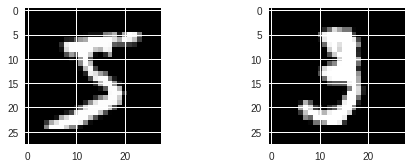

In [18]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))

plt.show()

In [0]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils




In [0]:
# fix random seed for reproducability
seed = 7
numpy.random.seed(seed)

In [0]:
#flatten 28*28 images to a 784 vector for feeding to perceptron

num_pixels= X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test=X_test.reshape(X_test.shape[0],num_pixels).astype('float32')


In [0]:
X_train = X_train / 255
X_test = X_test / 255

#one hot encode outputs

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

In [0]:
# Base line Model
def baseline_model():
  model=Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal',activation='softmax'))
  #Compile Model
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  return model


In [20]:
model=baseline_model()
model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)
#Final Evaluation model
scores=model.evaluate(X_test,y_test, verbose=0)
print("Error: %.2ff%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2716 - acc: 0.9227 - val_loss: 0.1397 - val_acc: 0.9595
Epoch 2/10
 - 7s - loss: 0.1101 - acc: 0.9683 - val_loss: 0.0961 - val_acc: 0.9704
Epoch 3/10
 - 6s - loss: 0.0699 - acc: 0.9801 - val_loss: 0.0733 - val_acc: 0.9772
Epoch 4/10
 - 6s - loss: 0.0491 - acc: 0.9860 - val_loss: 0.0692 - val_acc: 0.9791
Epoch 5/10
 - 6s - loss: 0.0358 - acc: 0.9899 - val_loss: 0.0659 - val_acc: 0.9795
Epoch 6/10
 - 6s - loss: 0.0261 - acc: 0.9931 - val_loss: 0.0674 - val_acc: 0.9784
Epoch 7/10
 - 6s - loss: 0.0199 - acc: 0.9950 - val_loss: 0.0596 - val_acc: 0.9807
Epoch 8/10
 - 6s - loss: 0.0152 - acc: 0.9964 - val_loss: 0.0597 - val_acc: 0.9800
Epoch 9/10
 - 6s - loss: 0.0104 - acc: 0.9978 - val_loss: 0.0634 - val_acc: 0.9804
Epoch 10/10
 - 6s - loss: 0.0072 - acc: 0.9988 - val_loss: 0.0582 - val_acc: 0.9816
Error: 1.84f%
